## Background:
The aim of this report  is to investigate the possibility of recognising everyday activity by classifying activities performed by the wearer of a wearable accelerometer mounted on the chest.  

The dataset [“Activity Recognition from Single Chest-Mounted Accelerometer Data Set”](https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer) was collected and made available by Casale, Pujol, et al. from the University of Barcelona in Spain. It is freely available from the UCI Machine Learning repository: Activity Recognition from Single Chest-Mounted Accelerometer Data Set. 

I have  worked with two different machine learning classification modelling namely K Nearest Neighbor and Decision Tree to achieve this objective. 

## Objective:
Develop machine learning models to recognise everyday activities performed by the wearer of a wearable accelerometer.

## Data description

- The dataset was comprised of uncalibrated accelerometer data from 15 different participants in CSV format, each performing 7 activities. 
- The accelerometer device collected data at 52 observations per second (52 Hertz) and accelerometers provided a measurement of force along the x, y, and z directions, and thus provide a view into the movement of the participant wearing the device.
- Each data file contains information of data generation sequence number, x acceleration, y acceleration, z acceleration, label. ‘label’ contains 7 following activities: 

    - 1: working at computer
    - 2: standing up, walking and going updown stairs
    - 3: standing
    - 4: walking
    - 5: going updown stairs
    - 6: walking and talking with someone
    - 7: talking while standing

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
#The dataset was comprised of uncalibrated accelerometer data from 15 different participants in CSV format, each performing 7 activities. 
df1 = pd.read_csv("1.csv", header=None)
df2 = pd.read_csv("2.csv", header=None)
df3 = pd.read_csv("3.csv", header=None)
df4 = pd.read_csv("4.csv", header=None)
df5 = pd.read_csv("5.csv", header=None)
df6 = pd.read_csv("6.csv", header=None)
df7 = pd.read_csv("7.csv", header=None)
df8 = pd.read_csv("8.csv", header=None)
df9 = pd.read_csv("9.csv", header=None)
df10 = pd.read_csv("10.csv", header=None)
df11 = pd.read_csv("11.csv", header=None)
df12 = pd.read_csv("12.csv", header=None)
df13 = pd.read_csv("13.csv", header=None)
df14 = pd.read_csv("14.csv", header=None)
df15 = pd.read_csv("15.csv", header=None)

In [3]:
#Concat of list of DataFrames with parameter keys for df names.
#Keys construct the hierarchical index using the passed keys as the outermost level.
#Reset index drops the column 1 index and this makes outermost level key as the new index.
#Then removing Index will make and create new column 'Participant', an unique sequence number against each record
dfs = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15]
df = pd.concat(dfs, keys=range(1, len(dfs) + 1)) \
 .reset_index(level=1, drop=True) \
.rename_axis('participant_id').reset_index()
df

,participant_id,0,1,2,3,4
0,1,0.0,1502,2215,2153,1
1,1,1.0,1667,2072,2047,1
2,1,2.0,1611,1957,1906,1
3,1,3.0,1601,1939,1831,1
4,1,4.0,1643,1965,1879,1
...,...,...,...,...,...,...
1926891,15,103500.0,2043,2539,1990,7
1926892,15,103500.0,2036,2508,1976,7
1926893,15,103500.0,2025,2520,1991,7
1926894,15,103500.0,2009,2546,2007,7


In [4]:
#Added column name to the data frame
df_cols = ['participant_id','seq', 'x', 'y', 'z', 'label']
df.columns = df_cols
df.head() 

,participant_id,seq,x,y,z,label
0,1,0.0,1502,2215,2153,1
1,1,1.0,1667,2072,2047,1
2,1,2.0,1611,1957,1906,1
3,1,3.0,1601,1939,1831,1
4,1,4.0,1643,1965,1879,1


In [5]:
#Labelled all the numerical label value using label dictionary in a new column (label_value)
# Created a dictionary 
label_dictionary ={1 : 'Working at Computer', 2 : 'Standing Up, Walking and Going updown stairs', 3 : 'Standing', 4 : 'Walking', 5:'Going UpDown Stairs', 6:'Walking and Talking with Someone', 7:'Talking while Standing'} 
  
# Add a new column named 'Label_Value' 
df['label_value'] = df['label'].map(label_dictionary) 
df

,participant_id,seq,x,y,z,label,label_value
0,1,0.0,1502,2215,2153,1,Working at Computer
1,1,1.0,1667,2072,2047,1,Working at Computer
2,1,2.0,1611,1957,1906,1,Working at Computer
3,1,3.0,1601,1939,1831,1,Working at Computer
4,1,4.0,1643,1965,1879,1,Working at Computer
...,...,...,...,...,...,...,...
1926891,15,103500.0,2043,2539,1990,7,Talking while Standing
1926892,15,103500.0,2036,2508,1976,7,Talking while Standing
1926893,15,103500.0,2025,2520,1991,7,Talking while Standing
1926894,15,103500.0,2009,2546,2007,7,Talking while Standing


## Data Understanding

To understand what the data is all about, plotted the data for a single participant using visualisation. For that imported pyplot from matplotlib.
Created below figure with a plot for **participant 1** with each variable i.e. x, y, and z accelerometer data and respective activity labels. Kept x,y, z and label on Y axis and sequence in X axis.


In [6]:
# Creating an array which I will use to assign names in the chart
LabelValues = [
"Working at Computer",
"Standing Up, Walking and Going updown stairs",
"Standing",
"Walking",
"Going UpDown Stairs",
"Walking and Talking with Someone",
"Talking while Standing"
] 

In [7]:
#plot the x, y, z acceleration and activities for a single subject
def plot_participant(participant):
	pyplot.figure()
	# create a plot for each column
	for col in range(participant.shape[1]):                   
                    if col ==0 or col ==1 :
                        continue
                    pyplot.figure(figsize=(18,18))
                    pyplot.subplot(participant.shape[1], 1, col+1)
                    if col ==5:
                        pyplot.yticks(np.arange(0, 8, 1)) #increasesd the range of y-axis for labels
                    if col ==2:
                        pyplot.title("X-accelaration", size = 12) 
                    if col ==3:
                        pyplot.title("Y-accelaration", size = 12) 
                    if col ==4:
                        pyplot.title("Z-accelaration", size = 12) 
                    if col ==5:
                        pyplot.title("Labels", size = 12) 
                    pyplot.plot(participant[:,col])
    
                   
	pyplot.show()




<Figure size 432x288 with 0 Axes>

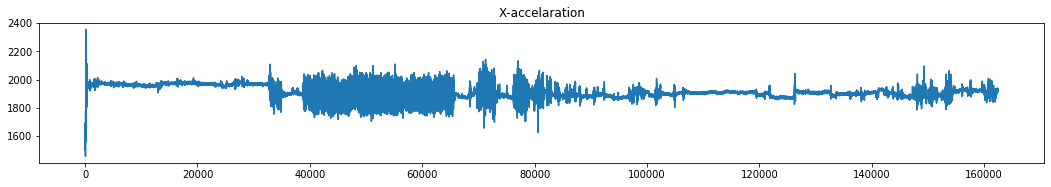

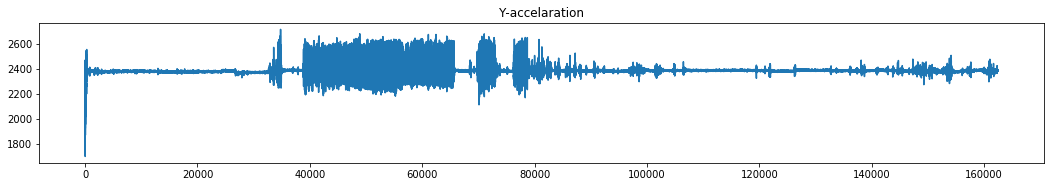

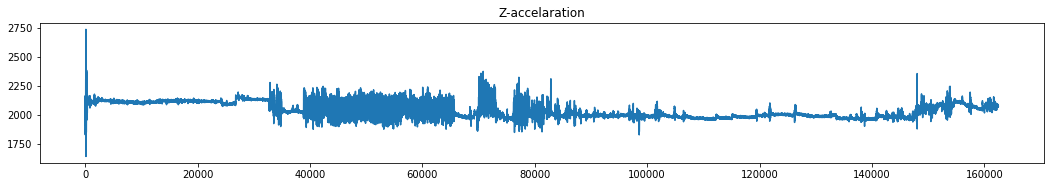

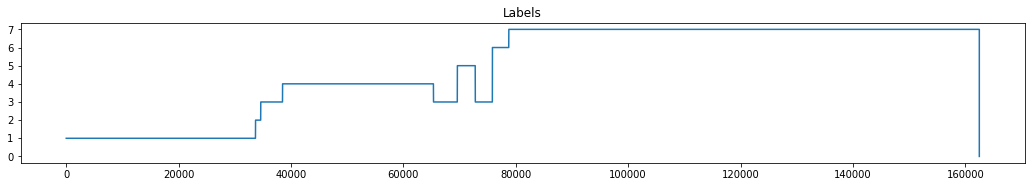

In [8]:
plot_participant(df[df.participant_id==1].iloc[:,:6].values) #replace the value of participant_id for each subject

#### Data Understanding
**For participant 1**, I understood that x,y and z are trace data with different amplitude and in between spikes. Labels varies with the fluctuation of the x,y & z trace. Focusing on labels, participant performed multiple actions (1>2>3>4>3>5>3>6>7). So there is no specific pattern in the order of the activities and activity 3 (standing) was repeated 3 times.


Similarly, I plotted the data for another participant **(participant 9)** using visualisation. Participant 9 also performed multiple activities (1>2>0>3>4>3>5>3>6>7) in different order with repetition of labels. Both participants spent different amount time in different activities. 

At the beginning of the sequence there is a burst of the data while there is no change is label. This is quite strange and looks like an outlier or noise created when the accelerometer device was activated. So I can remove these initial burst.

<Figure size 432x288 with 0 Axes>

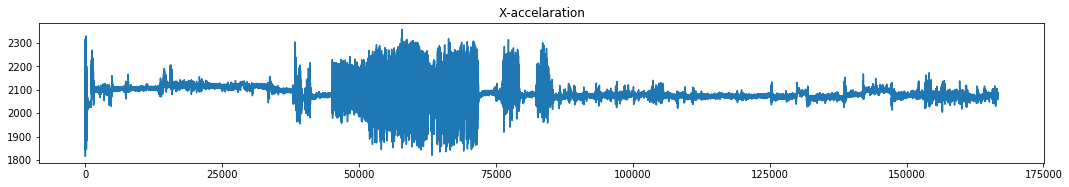

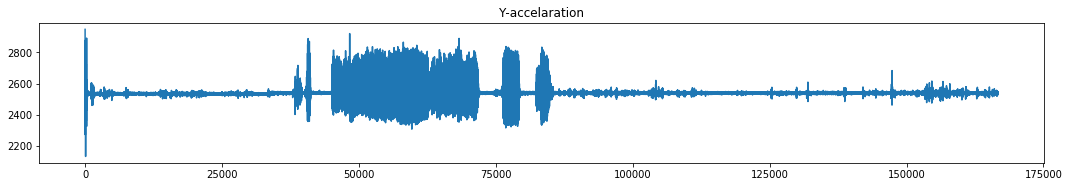

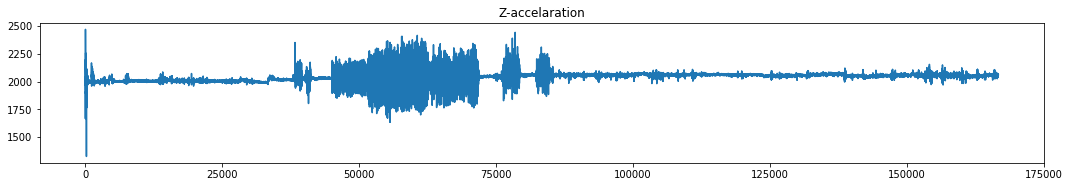

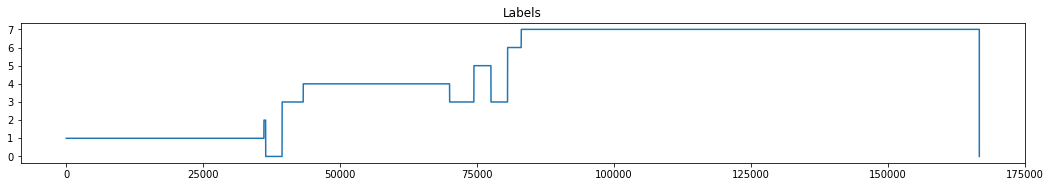

In [9]:
plot_participant(df[df.participant_id==9].iloc[:,:6].values)

## Data preparation and Data exploration

### Exploring data for each participant:
To identify if any manipulation will be required for any participant’s data, I plotted each participant’s x, y and z data in one chart and then lined up all participant’s chart vertically to compare participant’s chart with each other. Similarly charted associated activity labels for all participants separately and aligned vertically. Colour coded x, y and z data traces as skyblue, pink and purple respectively so that I can distinguish each data trace.

In [10]:
# rearranged the columns
df = df[['x', 'y','z','label','label_value','seq','participant_id']] 
#Forming an array grouped by participant id having columns x,y,z and label.
participants = []
for k,values in df.groupby('participant_id'):
    participants.append(values.iloc[:,:4].values)


<Figure size 432x288 with 0 Axes>

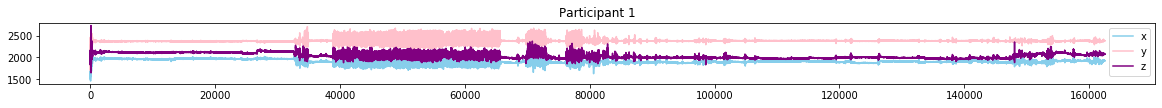

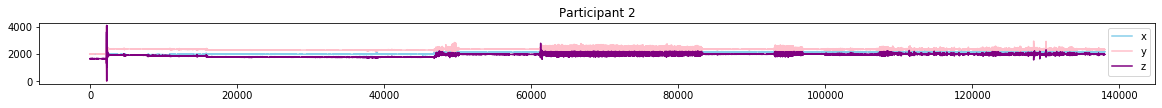

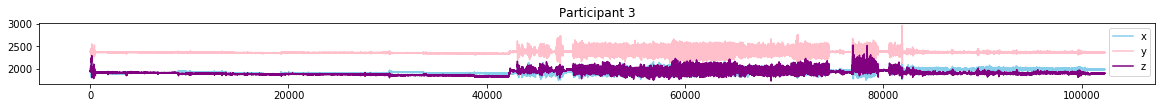

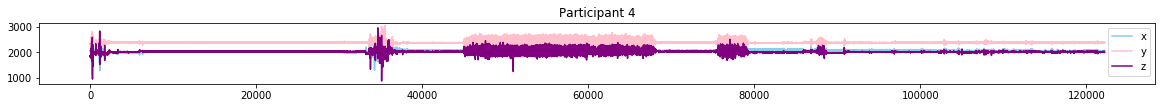

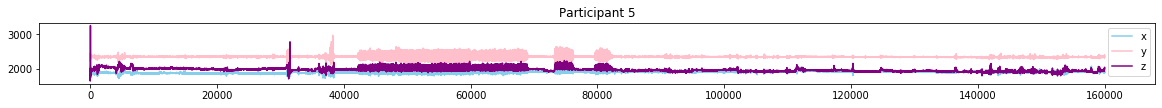

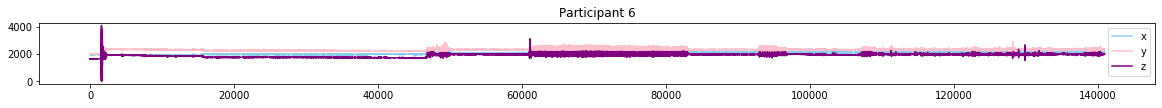

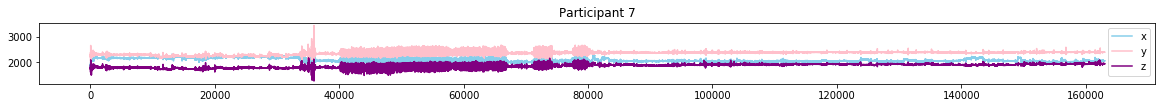

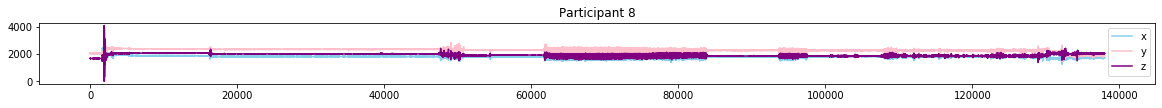

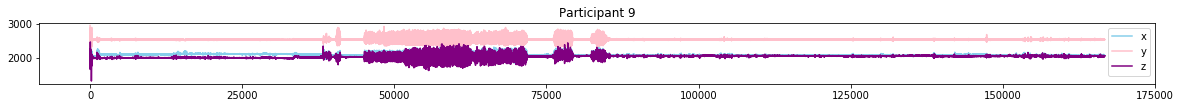

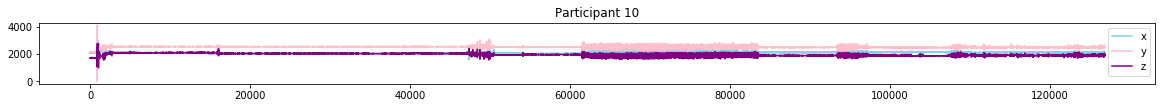

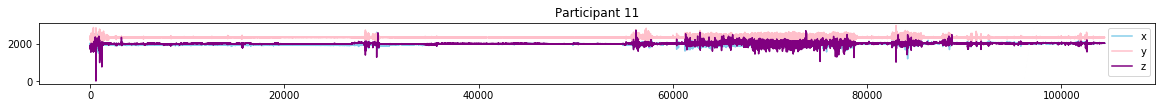

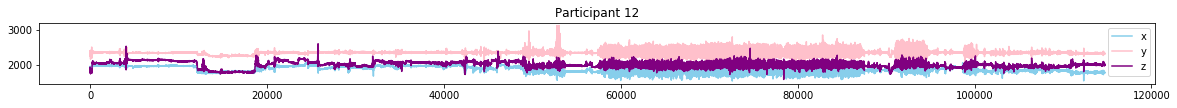

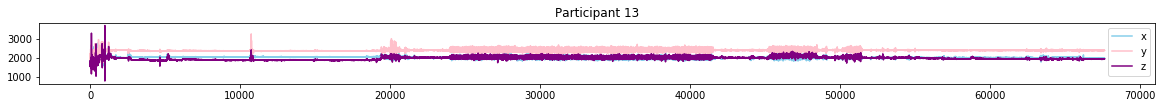

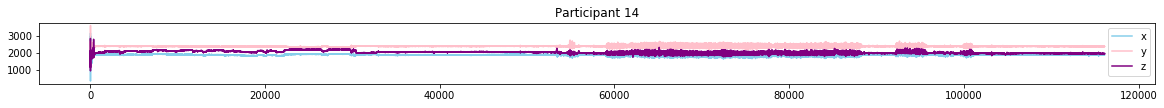

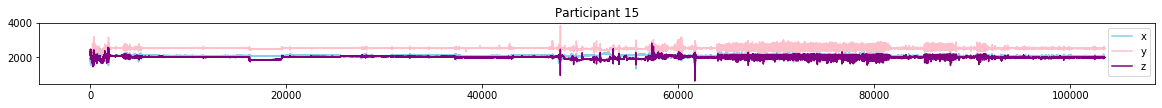

In [11]:
def plot_partcipants(participants):
    pyplot.figure()
# create a plot for each subject
    for i in range(len(participants)): # looping through each of the participants array element
        pyplot.figure(figsize=(20,20))
        pyplot.subplot(len(participants), 1, i+1)
        #pyplot.xlim(min,max)
        pyplot.title(('Participant '+str(i+1)), size = 12)
        for j in range(participants[i].shape[1]-1):   #loop it through the first 3 elements i.e x,y,z accelaration            
            color=''
            label=''
            if j==0:
                colorCode="skyblue"
                label='x'
            if j==1:
                colorCode="pink"
                label='y'
            if j==2:
                colorCode="purple"
                label='z'
            pyplot.plot(participants[i][:,j],color = colorCode ,label=label)
            pyplot.legend(loc='upper right')
pyplot.show()
plot_partcipants(participants)

<Figure size 432x288 with 0 Axes>

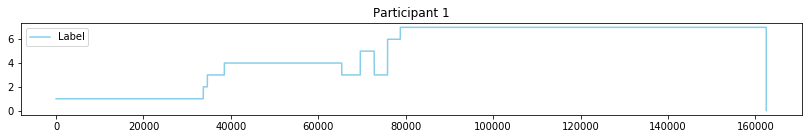

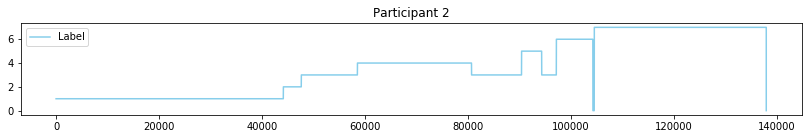

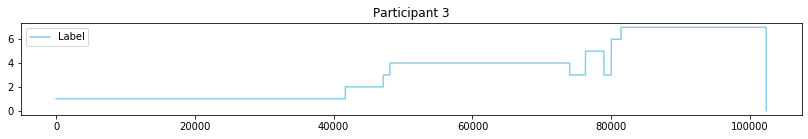

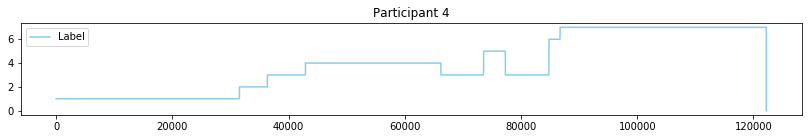

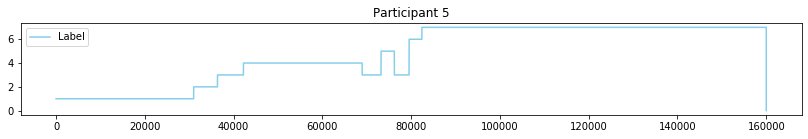

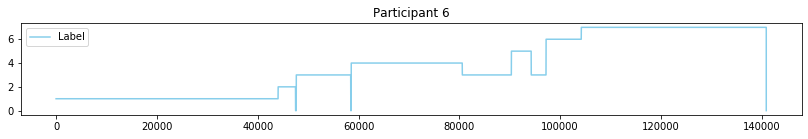

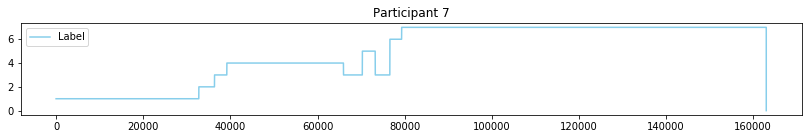

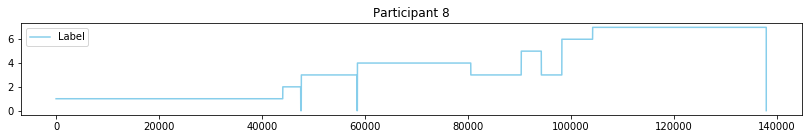

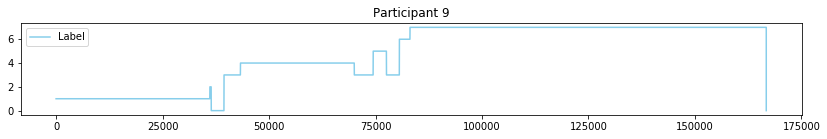

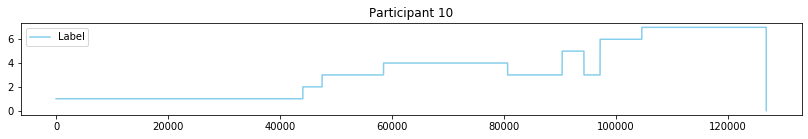

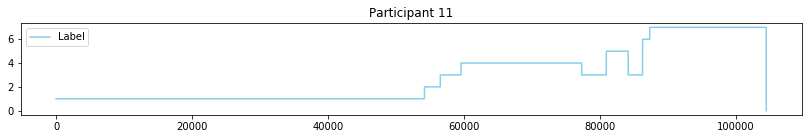

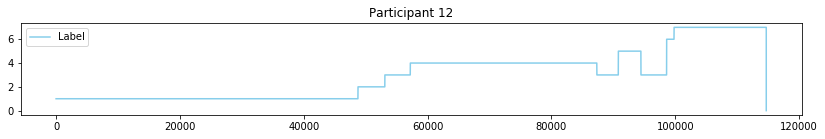

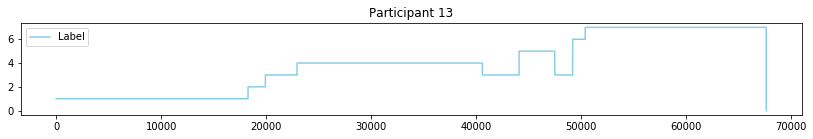

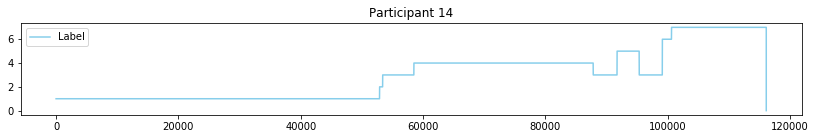

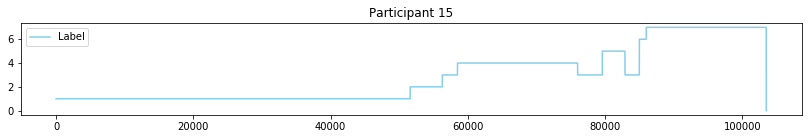

In [12]:
#Exploring labels for each participants
def plot_partcipantsLabel(participants):
    pyplot.figure()
# create a plot for each subject
    for i in range(len(participants)): # looping through each of the participants array element
        pyplot.figure(figsize=(14,30))
        pyplot.subplot(len(participants), 1, i+1)
        pyplot.yticks(np.arange(0,8,2))
        pyplot.title(('Participant '+str(i+1)), size = 12)
        pyplot.plot(participants[i][:,3],color = 'skyblue' ,label='Label')
        pyplot.legend(loc='upper left')
pyplot.show()
plot_partcipantsLabel(participants)

While I could not see any particular pattern among participants' activity levels, I could see more purple and pink and relatively less sky blue. This indicates either sky blue data (x acceleration data) has less impact on the label outcome or in the general amplitude of x acceleration is low.

Further data pattern and respective label change suggest that frequently y and z data changes simultaneously. This opened up the question of activity recognition can be performed using only one axis of data.

In general, the amplitude of the acceleration data is prominent for some participants and suppressed for some. This suggests that perhaps an adjustment in the scaling might be required and can result in better predictive modelling. However, I can do this within the model only if I have the full data sequence. In other word, for real-time prediction on unseen data scaling within the model will not work. This opens up the possibility to include this calibration feature in the device itself so that the accelerometer itself device transmits scaled calibrated data.

### Explore activities duration for each participant:

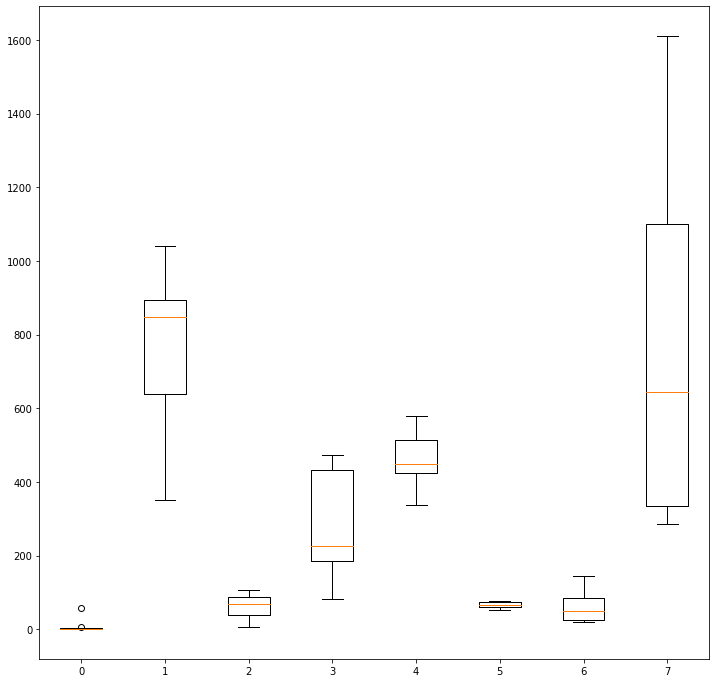

In [13]:
# returns a list of dict, where each dict has one sequence per activity
def group_by_activity(participants, activities):
    grouped = [{a:s[s[:,-1]==a] for a in activities} for s in participants]
    return grouped
# calculate total duration in sec for each activity per subject and plot
def calculate_durations(grouped, activities):
# calculate the lengths for each activity for each subject
    freq = 52
    durations = [[len(s[a])/freq for s in grouped] for a in activities]
    return durations
def plot_durations(grouped, activities):
    durations = calculate_durations(grouped, activities)
    pyplot.figure(figsize=(12,12))
    pyplot.boxplot(durations, labels=activities)
    pyplot.show()
    
# grouped
activities = [i for i in range(0,8)]
grouped = group_by_activity(participants, activities)
# plot durations
plot_durations(grouped, activities)



As seen earlier, from the length of the labels it is visible that each participant spent a different amount of time in different activities. So it is interesting to see in general which activities participants spent more time on and on which less. I have performed this operation using a user-defined function ‘group_by_activity’ by grouping the activity labels for each participant id. The accelerometer device collected data at 52 Hertz on three axes. This means data was generated at 52 observations per second and accelerometers provided a measurement of force along the x, y, and z directions. So to find duration in Seconds, I divided the total grouped length by 52. For visualisation plotted the distributions on a box plot chart.

Participants spent the lowest time in 0 (unknown) activities. Within labelled activities, participants spent less time on 5 (going up/down stairs), 2 (standing up, walking and going up/down stairs) and 6 (walking and talking). Activity 1 (standing Up, walking and going up/down stairs) and activity 7 (talking while standing) have the highest duration. So there is a possibility that 2, 6 and 5 might not have robust samples, so during modelling I will check if removing these activities from the model increases the prediction accuracy.


### Exploring distribution of observations:

For exploration of data distribution plotted histogram for each participant using pyplot.hist function. Colour coded x, y and z data traces as skyblue, pink and purple respectively so that I can distinguish each axis data distribution.

<Figure size 432x288 with 0 Axes>

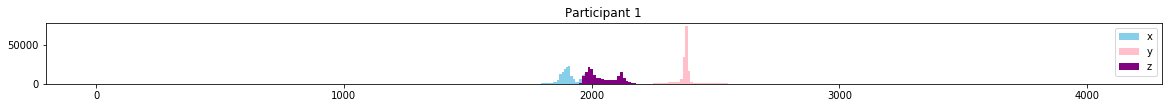

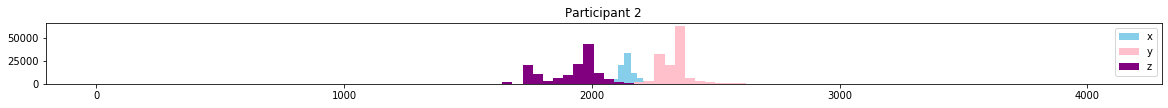

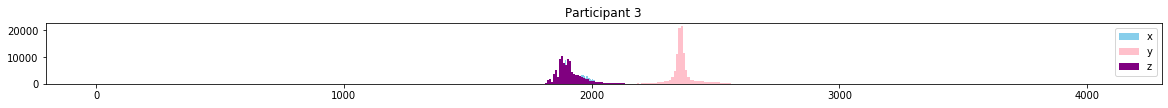

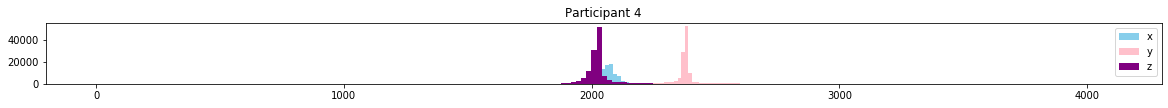

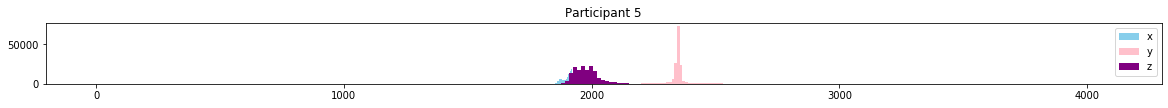

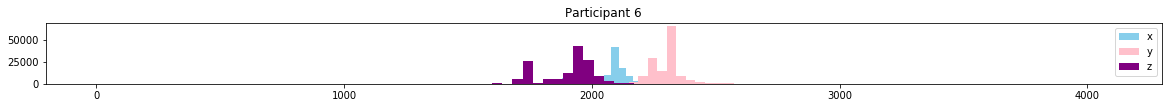

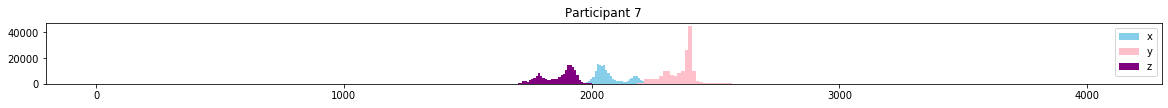

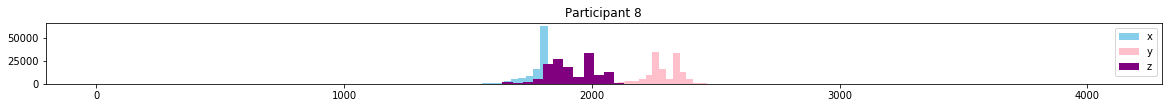

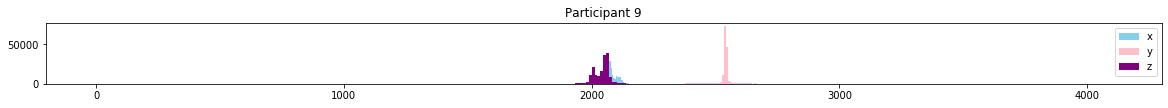

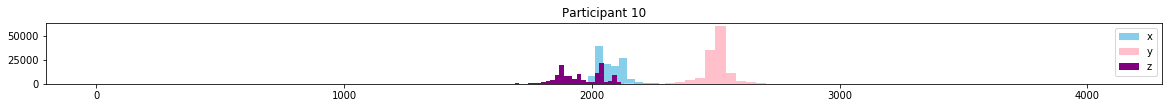

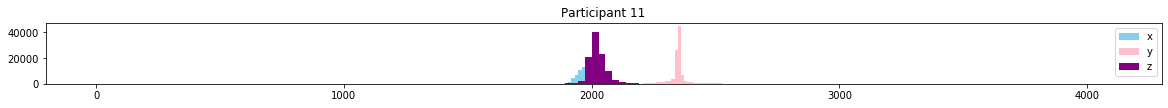

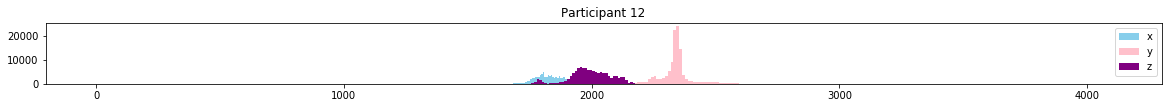

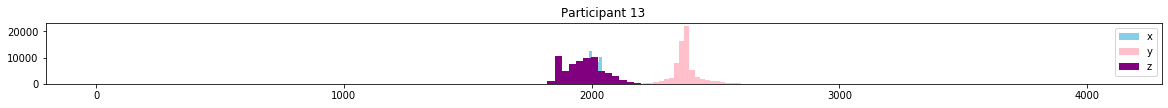

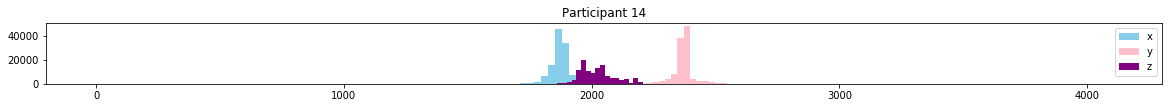

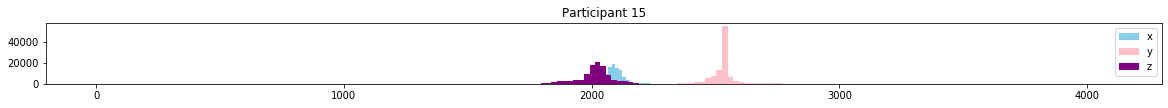

In [14]:
# plot the x, y, z acceleration for each subject
def plot_subjects(participants):
    pyplot.figure()
# create a plot for each subject
    xaxis = None
    for i in range(len(participants)): # looping through each of the participants array element
        pyplot.figure(figsize=(20,20))
        ax = pyplot.subplot(len(participants), 1, i+1, sharex=xaxis)
        if i == 0:
            xaxis = ax
        # plot a histogram of x data
        pyplot.title(('Participant '+str(i+1)), size = 12)
        for j in range(participants[i].shape[1]-1):   #loop it through the first 3 elements i.e x,y,z accelaration            
            color=''
            label=''
            if j==0:
                colorCode="skyblue"
                label='x'
            if j==1:
                colorCode="pink"
                label='y'
            if j==2:
                colorCode="purple"
                label='z'
            pyplot.hist(participants[i][:,j], bins=100, color = colorCode ,label=label)
            pyplot.legend()
    pyplot.show()
plot_subjects(participants)



I could see most of the data point clustered around 2000. Within each participant, x and z spread position is relatively left while y is relatively right. Further x and z have wider spread and frequently overlapping each other while y has often limited spread and high spiked frequency trace.

### Additional data preparation:

As identified during the data understanding stage, at the beginning of the sequence there is an unusual burst of the data while there is no change in label. This looks like an outlier or noise created when the accelerometer device was activated. So removed 1st 90 seconds of the data for each participant; i.e. remove 90 seconds * 52 hertz = 4680 sequence of data from all respondents. 

In [15]:
df = df[(df.seq>4679)]

In [16]:
df.loc[df.participant_id==3, :] # checking removal took place properly.

,x,y,z,label,label_value,seq,participant_id
305182,1906,2361,1908,1,Working at Computer,4680.0,3
305183,1903,2364,1912,1,Working at Computer,4681.0,3
305184,1908,2367,1908,1,Working at Computer,4682.0,3
305185,1908,2366,1913,1,Working at Computer,4683.0,3
305186,1908,2370,1907,1,Working at Computer,4684.0,3
...,...,...,...,...,...,...,...
402838,1979,2363,1893,7,Talking while Standing,102340.0,3
402839,1979,2367,1902,7,Talking while Standing,102340.0,3
402840,1982,2364,1898,7,Talking while Standing,102340.0,3
402841,1983,2359,1898,7,Talking while Standing,102340.0,3


As identified in histogram distribution, most of the data points clustered around 2000. So I can assume that any data point less than 1000 and above 3000 is an outlier. So I have removed those observations for all participants. 

In [17]:
df=df[(df['x']>999) | (df['y']>999) | (df['z']>999) | (df['x']<3001) | (df['y']<3001) | (df['z']<3001)]


Further, 0 label is undefined and will not have any meaningful contribution in the activity recognition prediction. So removed all observations that have label 0 (zero) for all participants.

In [18]:
df=df[df['label']!=0]

In [19]:
df['label'].value_counts() # Checking if label 0 is removed.

7    593563
1    538467
4    357064
3    216737
5     51498
2     47878
6     47770
Name: label, dtype: int64

In [20]:
#As seen earlier each participants have different data pattern, so for better training of the model sampling is recommended for creating the folds. 
df=df.sample(frac=1)

### Data Modelling:

My goal in this work is to use machine learning methods to recognise participants’ activities by classifying activities performed by the wearer (participants) of a wearable accelerometer mounted on the chest. Essentially I need to use Classification techniques which can be used to predict activities with good accuracy. I will use K Nearest Neighbour and Decision Tree models for this task. While K Nearest Neighbour takes the majority and classifies the unknown data into that category, Decision tree predicts the best choice mathematically. Both the modelling technique suits the main objective.

In this context, I can also use Random Forest which uses a lot of decision trees, an ensemble, where each tree different from the others. When we get a new data, it takes the majority vote of the ensemble to get the final result. I can also use Logistic Regression where input values are combined linearly using weights or coefficient values to predict an output. However, in my course, I have covered only KNN and Decision Tree; so will limit my modelling to these two prediction algorithms.

In [21]:
#creating X (features) and y(response)
X= df.iloc [:, 0:3]
y=df.iloc [:, 3]

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [23]:
# use train/test split with 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12) 

### Implemented KNeighborsClassifier:
**Optimising K in KNN:** Choosing the optimal value of K is critical, so I fit and tested the KNN model for different values for K (from 10 to 100 and 100 to 1000) using a for loop and record the KNN’s testing accuracy in a variable. 

I found that k=60 returns a high performance.

In [24]:
k_range = list(range(10, 100, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7456429896890123, 0.753608552851239, 0.7557753375351927, 0.756769683906318, 0.7571413831224028, 0.757300586337979, 0.7570692018525316, 0.7569646403487693, 0.7569261887379735]


Text(0, 0.5, 'Cross-Validated Accuracy')

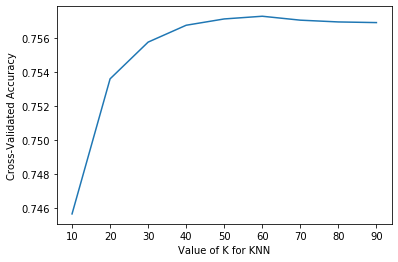

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [26]:
k_range = list(range(100, 1000, 100))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7567973418085038, 0.7544187359378872, 0.7519753695153005, 0.7499880261459009, 0.7480816335341555, 0.7462305575641126, 0.7443761084986946, 0.7427355046587384, 0.7410456556609263]


Text(0, 0.5, 'Cross-Validated Accuracy')

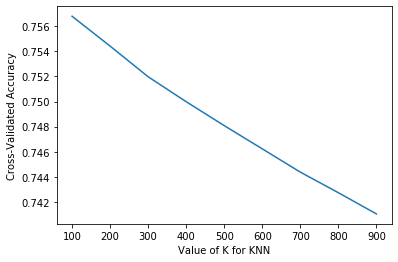

In [27]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### KNeighborsClassifier performance with optimised parameters

In [31]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=60)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7570696931429374


In [32]:
# Print out the confusion matrix 
print(metrics.confusion_matrix(y_test, y_pred))

[[100439    563    812   2226     35     22   3576]
 [  3654   1707    500   2182     25     15   1561]
 [  1909    123  20207   9904    679    394   9997]
 [  4308    194   3217  54097    170    178   9258]
 [   683     10   1889   4478   1226    114   1877]
 [   386     22   1106   1952    334   1958   3942]
 [  4039    208   4238   8209    208    832 100933]]


In [33]:
# Print out the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90    107673
           2       0.60      0.18      0.27      9644
           3       0.63      0.47      0.54     43213
           4       0.65      0.76      0.70     71422
           5       0.46      0.12      0.19     10277
           6       0.56      0.20      0.30      9700
           7       0.77      0.85      0.81    118667

    accuracy                           0.76    370596
   macro avg       0.65      0.50      0.53    370596
weighted avg       0.74      0.76      0.74    370596



## Implemented and hyperparameter tuning for Decision Tree

I found that 14 max_depth and 30 min_samples_leaf return result in high performance.

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [35]:
#Tuning max_depth for Decision Tree
k_range = list(range(1, 20, 2))
k_scores = []
for k in k_range:
    dtree = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.365648912307207, 0.4835625922710207, 0.5912676967522538, 0.6520975384145979, 0.6945461386453609, 0.7213577341464326, 0.735711668981857, 0.7424231689810437, 0.7389631953010011, 0.7288106098973781]


Text(0, 0.5, 'Cross-Validated Accuracy')

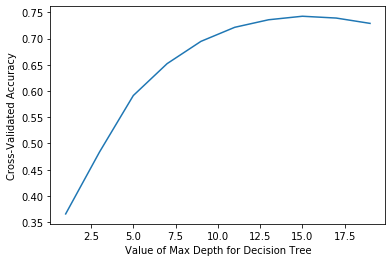

In [36]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of Max Depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

In [37]:
#Tuning min_samples_leaf for Decision Tree
k_range = list(range(1, 60, 5))
k_scores = []
for k in k_range:
    dtree = DecisionTreeClassifier(min_samples_leaf=k)
    scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.6606506692494181, 0.7187275066129103, 0.7357534937995207, 0.7424400340301531, 0.7455883474993736, 0.7475561275290327, 0.7483973419818495, 0.7492014536915927, 0.7495859701158268, 0.7497418006251135, 0.7497235867856439, 0.7497856490856638]


Text(0, 0.5, 'Cross-Validated Accuracy')

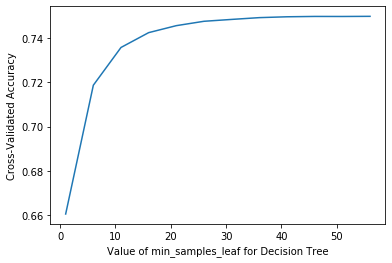

In [38]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of min_samples_leaf for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

#### Decision tree performance with optimised parameters

In [39]:
dtree = DecisionTreeClassifier(max_depth=14, min_samples_leaf=30)
dtree.fit(X_train, y_train)
predicted = dtree.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))

0.7426226942546601


In [40]:
# Print out the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

[[ 99681    410   1085   2165     25     28   4279]
 [  4091   1088    478   2126     23     14   1824]
 [  2296     85  19521   9612    618    367  10714]
 [  5067    217   3706  52053    191    181  10007]
 [   745      9   2022   4359   1064     75   2003]
 [   445     19   1074   1868    364   1718   4212]
 [  4676    146   4770   8012    100    875 100088]]


In [41]:
# Print out the classification report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           1       0.85      0.93      0.89    107673
           2       0.55      0.11      0.19      9644
           3       0.60      0.45      0.51     43213
           4       0.65      0.73      0.69     71422
           5       0.45      0.10      0.17     10277
           6       0.53      0.18      0.27      9700
           7       0.75      0.84      0.79    118667

    accuracy                           0.74    370596
   macro avg       0.63      0.48      0.50    370596
weighted avg       0.72      0.74      0.72    370596



## Conclusion: 
**This work aimed to explore the possibility of recognising everyday activity using machine learning model. Both the used classification algorithm (K Nearest Neighbor and Decision Tree) have recognised common human activities with a high accuracy.**

This work has also opened up following new research questions: 
- Data exploration has indicated that x acceleration data in general have low amplitude. Further evaluation can be conducted to understand to what extent x data is required to predict the activities.
- Data pattern and respective label change suggests that frequently y and z data changes simultaneously. This raises the question if activity recognition can be performed using only one axis data. 
- It can be worthwhile to explore how the models perform with the sampling of accelerometer data (by 0.25, 0.5, 1 seconds etc.)


## REFERENCES:

- Casale, P. Pujol, O. and Radeva, P.
'BeaStreamer-v0.1: a new platform for Multi-Sensors Data Acquisition in Wearable Computing Applications',
CVCRD09, ISBN: 978-84-937261-1-9, 2009
available on [Web Link]
- Choudhury, T., Lamarca, A., Legr, L., Rahimi, A., Rea, A., Borriello, G., Hemingway, B., Koscher, K., Lester, J., Wyatt, D., Haehnel, D.: The Mobile Sensing Platform: An Embedded Activity Recognition System. IEEE Pervasive Computing 7, 32–41 (2008)
- Sourav Bhattacharya, Petteri Nurmi, Nils Hammerla, Thomas Plötz,  Using unlabeled data in a sparse-coding framework for human activity recognition http://www.cba.gatech.edu/wp-content/uploads/2019/10/Using-unlabeled-data.pdf
- Kose, M., Incel, O.D. and Ersoy, C., 2012, April. Online human activity recognition on smart phones. In Workshop on Mobile Sensing: From Smartphones and Wearables to Big Data (Vol. 16, No. 2012, pp. 11-15).
- Bao, L.; Intille, S. Activity Recognition From User-Annotated Acceleration Data. In Pervasive Computing; Springer: Heidelberg/Berlin, Germany, 2004; pp. 1–17.
- https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
